This notebook is just an experiment to try and have our network detect an _unknown_ class when we have an out of distribution image. It's not part of the ML Zoomcamp course.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Xception transfer learning

In [4]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './train',
    target_size=(150, 150),
    batch_size=32
)

Found 20000 images belonging to 2 classes.


In [5]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [6]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './val',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [7]:
val_ds.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

input = keras.Input(shape=(150, 150, 3))
base = base_model(input, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
hidden = Dense(64, activation='relu')(vectors)
outputs = Dense(2)(hidden)
model = keras.Model(input, outputs)

2021-11-21 17:42:28.463508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:42:28.565680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:42:28.566256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:42:28.566972: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

83697664/83683744 [==============================] - 11s 0us/step


In [9]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 20,992,746
Trainable params: 131,266
Non-trainable params: 20,861,480
_________________________________________________________________


In [11]:
from tensorflow.keras.preprocessing.image import load_img
path = './val/cats'
name = 'cat.10222.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(150, 150))

X = np.array([np.array(img)])
X.shape

(1, 150, 150, 3)

In [12]:
model.predict(X)

2021-11-21 17:42:53.376296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-21 17:42:54.110133: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2021-11-21 17:42:54.365481: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-21 17:42:54.366122: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-21 17:42:54.366145: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2021-11-21 17:42:54.366974: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-11-21 17:42:54.367218: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx co

array([[0.02498629, 9.857276  ]], dtype=float32)

In [13]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 58s 88ms/step - loss: 0.1149 - accuracy: 0.9650 - val_loss: 0.0880 - val_accuracy: 0.9658
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0698 - accuracy: 0.9734 - val_loss: 0.0885 - val_accuracy: 0.9656
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0600 - accuracy: 0.9763 - val_loss: 0.0916 - val_accuracy: 0.9648
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0587 - accuracy: 0.9780 - val_loss: 0.1026 - val_accuracy: 0.9624
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0547 - accuracy: 0.9786 - val_loss: 0.1483 - val_accuracy: 0.9626
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0480 - accuracy: 0.9811 - val_loss: 0.1019 - val_accuracy: 0.9672
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0462 - accuracy: 0.9815 - val_loss: 0.1147 - val_accuracy:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

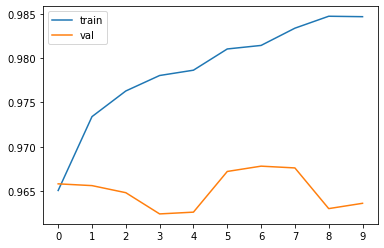

In [15]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# Downloading additional datasets

In [17]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("open-images-v6", split="validation")
session = fo.launch_app(dataset)

 100% |███████████████| 41620/41620 [44.6m elapsed, 0s remaining, 16.2 files/s]      
Dataset info written to '/home/ziri/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |█████████████| 41620/41620 [13.0m elapsed, 0s remaining, 61.1 samples/s]      
Dataset 'open-images-v6-validation' created


# Xception with 2 heads

In [21]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

input = keras.Input(shape=(150, 150, 3))
base = base_model(input, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)

hidden_dogs = Dense(64, activation='relu')(vectors)
outputs_dogs = Dense(2)(hidden_dogs)

hidden_cats = Dense(64, activation='relu')(vectors)
outputs_cats = Dense(2)(hidden_cats)

model = keras.Model(input, [outputs_dogs, outputs_cats])

In [19]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

losses = {
    "outputs_dogs": "categorical_crossentropy",
    "outputs_cats": "categorical_crossentropy"
}

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, 5, 5, 2048)   20861480    input_4[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           xception[0][0]                   
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           131136      global_average_pooling2d_1[0][0] 
____________________________________________________________________________________________

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)